# Analysis Notebook

All the utilities used in this notebook are from the utils.py file in the directory.

In [2]:
from utils import *

### Creating the theta values.

Uses the a formula to create values of theta and their uncertainties. fm is weighted by the gradient of the line of best fit between the two.

---Reading: DS_G3X_snap_066_center-cluster_progenitors.txt---


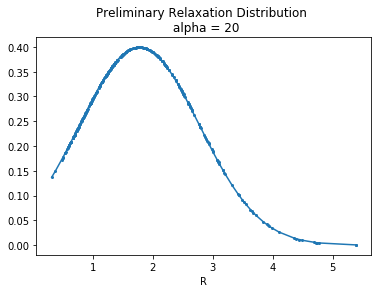

In [3]:
#: dicts: Dictionarys of the R200 and R500 data.
R200, R500 = read_data('dat/')
#: flt: Set the test alpha parameter.
for rshift, params in R200.items():
    #: ndarrays: Parameters from values.
    eta, delta, fm = params[:,1], params[:,2], params[:,3]
    #: ndarrays: Theta values and uncertainties.
    theta, theta_err = calc_theta(fm, delta)
    #: Add these columns to the ndarray.
    params = np.concatenate([np.concatenate([params,theta[:,None]],axis=1),
                             theta_err[:,None]],axis=1)
    r, r_err = calc_relax(theta, theta_err, eta, alpha=20)
    params = np.concatenate([np.concatenate([params,r[:,None]],axis=1),
                             r_err[:,None]],axis=1)
    if rshift == 0.0:
        #: Plot distribution of Relaxation coefficients.
        plot_dist(r,
                  'R',
                  'Preliminary Relaxation Distribution \n alpha = 20',
                  'prelim_r_dist')